In [1]:
!date

Sun Mar  1 19:25:42 PST 2020


# Basic plots

In [2]:
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import scanpy as scanp
from scipy.stats import ks_2samp, ttest_ind
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [4]:
isoform = anndata.read_h5ad("../cell_ranger_annotation/isoform.h5ad")
gene =    anndata.read_h5ad("../cell_ranger_annotation/gene.h5ad")

In [25]:
cluster_cmap = {
"Astro": (0.38823529411764707, 0.4745098039215686,  0.2235294117647059 ),  # 637939,
"Endo" : (0.5490196078431373,  0.6352941176470588,  0.3215686274509804 ),  # 8ca252,
"SMC"  : (0.7098039215686275,  0.8117647058823529,  0.4196078431372549 ),  # b5cf6b,
"VLMC" : (0.807843137254902,   0.8588235294117647,  0.611764705882353  ),  # cedb9c,
"Low Quality" : (0,0,0),
#"Astro" : (0.9019607843137255,  0.3333333333333333,  0.050980392156862744),  # e6550d #reds
#"Endo" : (0.9921568627450981,  0.5529411764705883,  0.23529411764705882 ),  # fd8d3c
"L2/3 IT" : (0.9921568627450981,  0.6823529411764706,  0.4196078431372549  ),  # fdae6b
"L5 ET" : (0.9921568627450981,  0.8156862745098039,  0.6352941176470588  ),  # fdd0a2
"L5 IT" : (0.5176470588235295,  0.23529411764705882, 0.2235294117647059 ),  # 843c39
#"L5/6 NP" : (0.6784313725490196,  0.28627450980392155, 0.2901960784313726 ),  # ad494a
"L5/6 NP": "#D43F3A",
"L6 CT" : (0.8392156862745098,  0.3803921568627451,  0.4196078431372549 ),  # d6616b
"L6 IT" : (0.9058823529411765,  0.5882352941176471,  0.611764705882353  ),  # e7969c
"L6b" : (1.0,                 0.4980392156862745,  0.054901960784313725),  # ff7f0e
"L6 IT Car3" : (1.0,                 0.7333333333333333,  0.47058823529411764 ),  # ffbb78
#"Low Quality" : (0.5490196078431373,  0.42745098039215684, 0.19215686274509805),  # 8c6d31
#"SMC" : (0.7411764705882353,  0.6196078431372549,  0.2235294117647059 ),  # bd9e39
#"VLMC" : (0.9058823529411765,  0.7294117647058823,  0.3215686274509804 ),  # e7ba52
# (0.9058823529411765,  0.796078431372549,   0.5803921568627451 ),  # e7cb94
"Lamp5" : (0.19215686274509805, 0.5098039215686274,  0.7411764705882353  ),  # 3182bd # blues
"Sncg" : (0.4196078431372549,  0.6823529411764706,  0.8392156862745098  ),  # 6baed6
"Vip" : (0.6196078431372549,  0.792156862745098,   0.8823529411764706  ),  # 9ecae1
"Sst" : (0.7764705882352941,  0.8588235294117647,  0.9372549019607843  ),  # c6dbef
#"Pvalb" : (0.4588235294117647,  0.4196078431372549,  0.6941176470588235  ),  # 756bb1
#(0.6196078431372549,  0.6039215686274509,  0.7843137254901961  ),  # 9e9ac8
"Pvalb":(0.7372549019607844,  0.7411764705882353,  0.8627450980392157  ),  # bcbddc
#"Pvalb":(0.8549019607843137,  0.8549019607843137,  0.9215686274509803  ),  # dadaeb
}

cluster_order = [
    "Lamp5",
    "Sncg",
    "Vip",
    "Sst",
    "Pvalb",
    "L5 IT",
    "L5/6 NP",
    "L5 ET",
    "L2/3 IT",
    "L6b",
    "VLMC",
    "L6 IT",
    "L6 CT",
    "L6 IT Car3",
    "Endo",
    "Astro",
    "SMC",
    "Low Quality"
]

# Annotate clusters

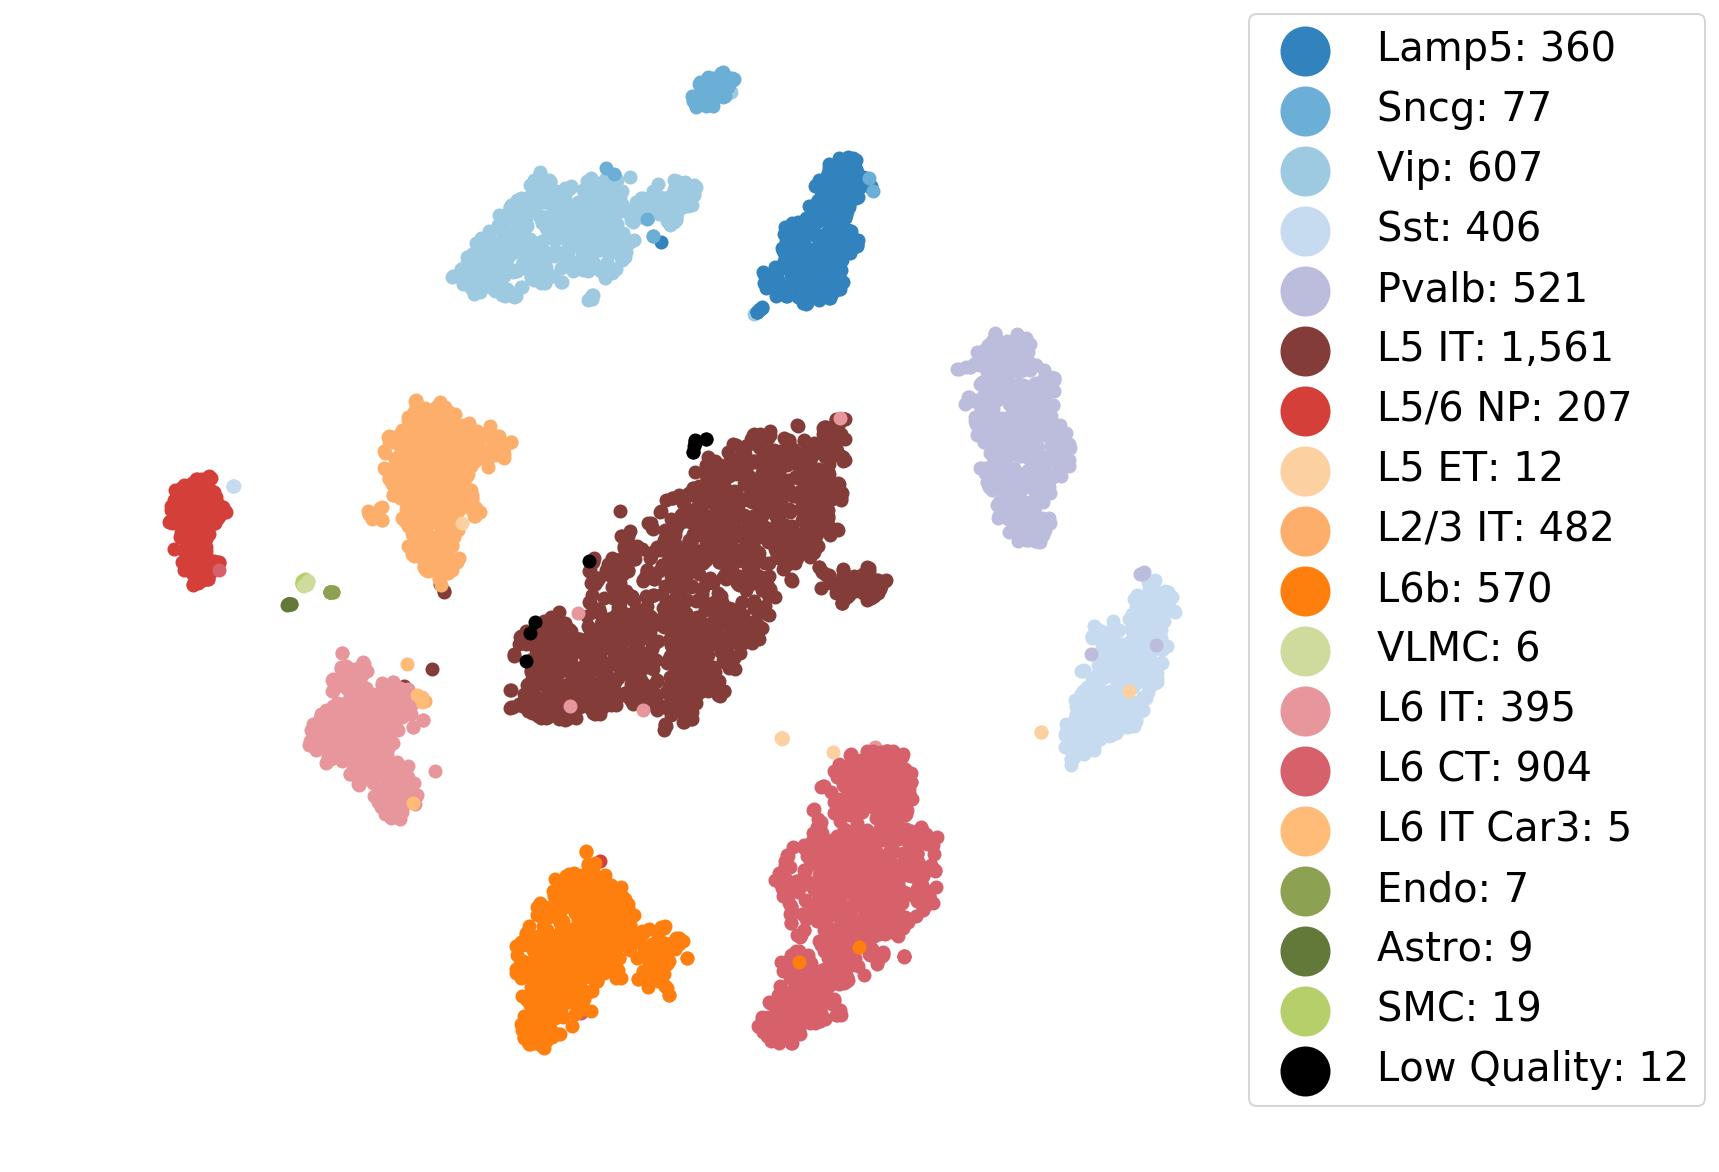

In [45]:
fig, ax = plt.subplots(figsize=(10,10))

c = gene.obs["subclass_label"].unique().astype(str)
cmap = cm.get_cmap("tab20")

for idx, cluster in enumerate(c):
    XX = gene[gene.obs.subclass_label == cluster,:].obsm["X_nca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    
    color = cluster_cmap[cluster]
    
    ax.scatter(x, y, color = color, label=cluster+": {:,}".format(x.shape[0]))
    # if cluster == "Endo": y = y-5; x=x+5
    # if cluster == "SMC": y = y+5; x=x+2
    # if cluster == "VLMC": x=x-20; y=y-5
    # if cluster == "L6 IT Car3": x = x+10;y=y-20
    # if cluster == "Astro": x=x-10;y=y-10
    # if cluster == "Sncg": x = x+5; y = y-5
    # ax.annotate(cluster, 
    #          (np.mean(x), np.mean(y)),
    #          horizontalalignment='center',
    #          verticalalignment='center',
    #          size=15, weight='bold',
    #          color="white",
    #            backgroundcolor=color) 
    

handles, labels = ax.get_legend_handles_labels()
idx = [np.where(c==i)[0][0] for i in cluster_order]
handles = np.array(handles)[idx]
labels=np.array(labels)[idx]

ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=4)
ax.set_axis_off()

plt.savefig("./figures/subclass_nca.png",bbox_inches='tight', dpi=300)


plt.show()

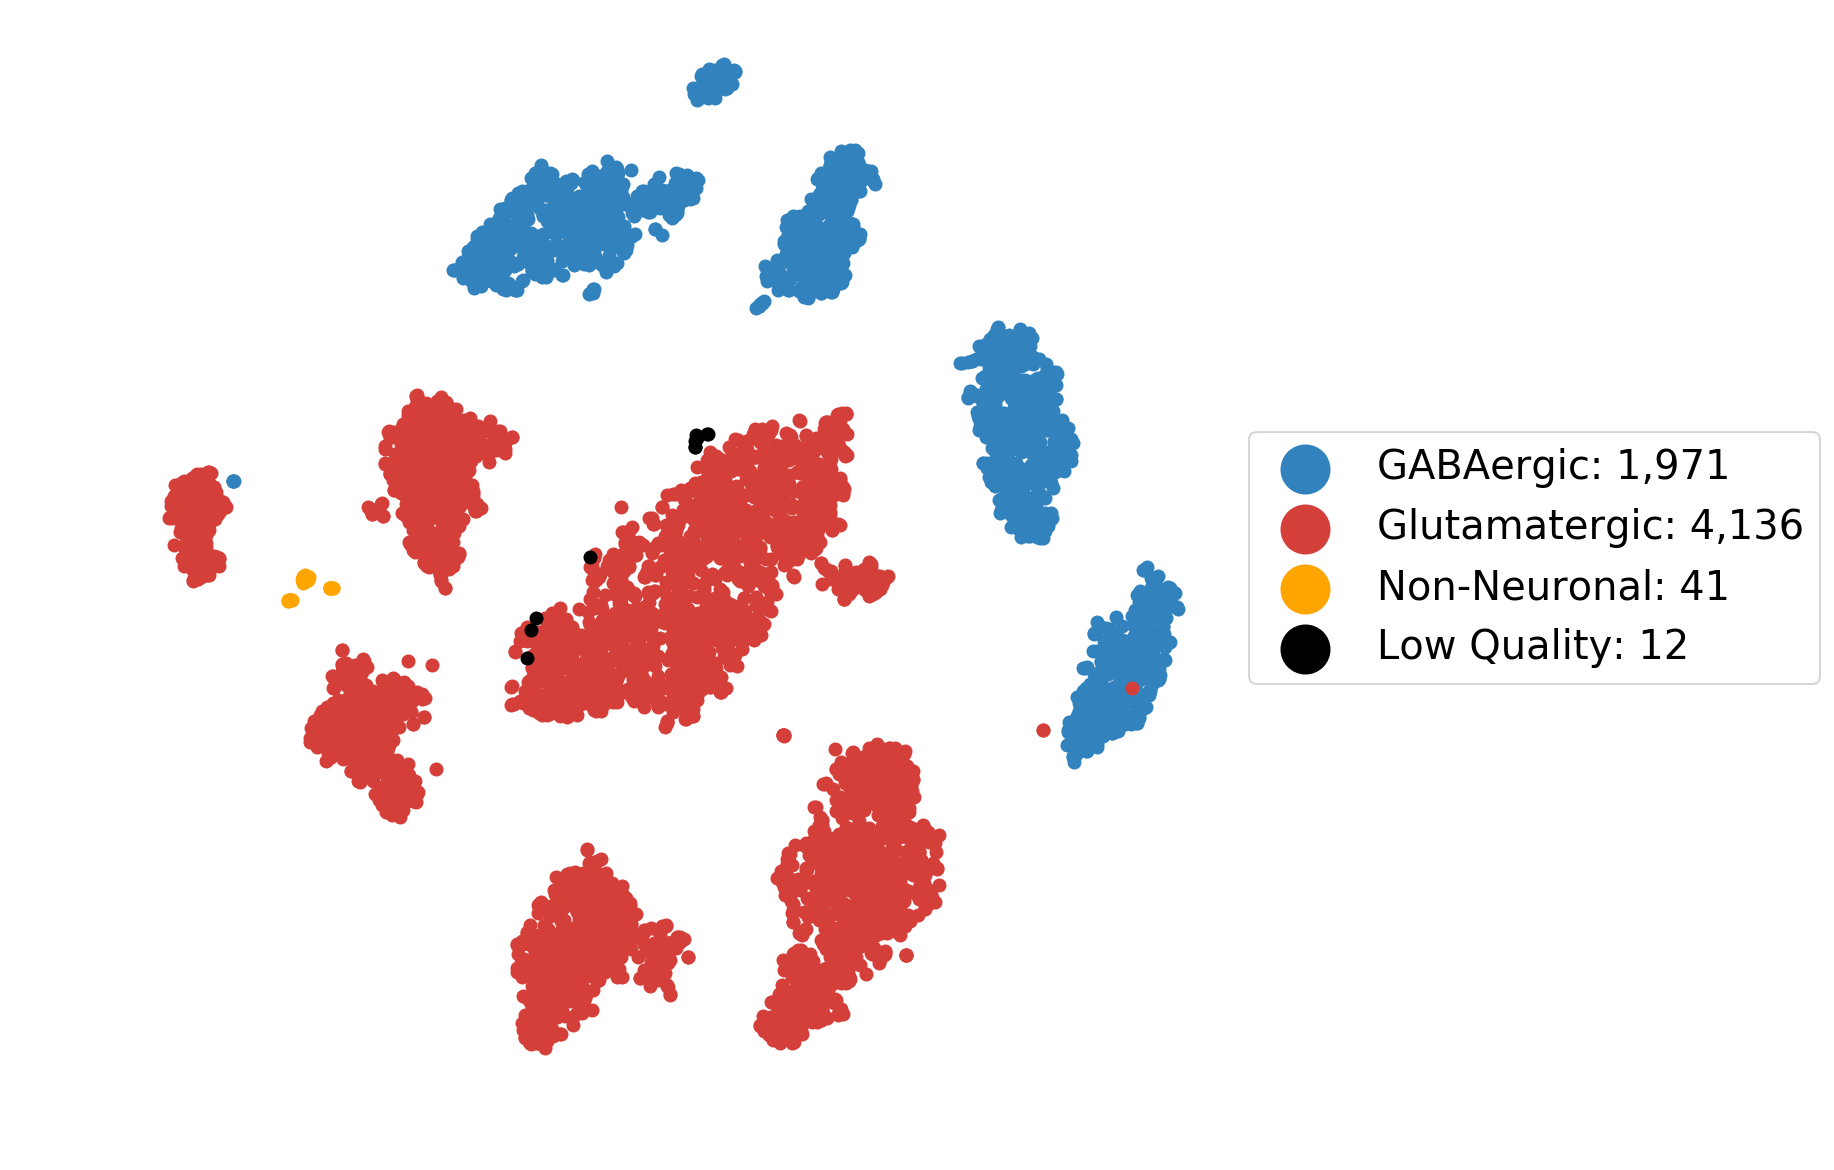

In [46]:
fig, ax = plt.subplots(figsize=(10,10))

c = gene.obs["class_label"].unique()
cmap = cm.get_cmap("tab20")

for idx, cluster in enumerate(c):
    XX = gene[gene.obs.class_label == cluster,:].obsm["X_nca_tsne"]
    
    x = XX[:,0]
    y = XX[:,1]
    
    if cluster == "Low Quality": color ="black"
    if cluster == "Glutamatergic": color="#D43F3A"
    if cluster == "GABAergic": color="#3182bd"
    if cluster == "Non-Neuronal": color="orange"
    
    ax.scatter(x, y, color = color, label=cluster+": {:,}".format(x.shape[0]))
    # if cluster == "Non-Neuronal": y=y-10
    # ax.annotate(cluster, 
    #          (np.mean(x), np.mean(y)),
    #          horizontalalignment='center',
    #          verticalalignment='center',
    #          size=15, weight='bold',
    #          color="white",
    #            backgroundcolor=color) 
    

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=4)
ax.set_axis_off()

plt.savefig("./figures/class_nca.png",bbox_inches='tight', dpi=300)

plt.show()

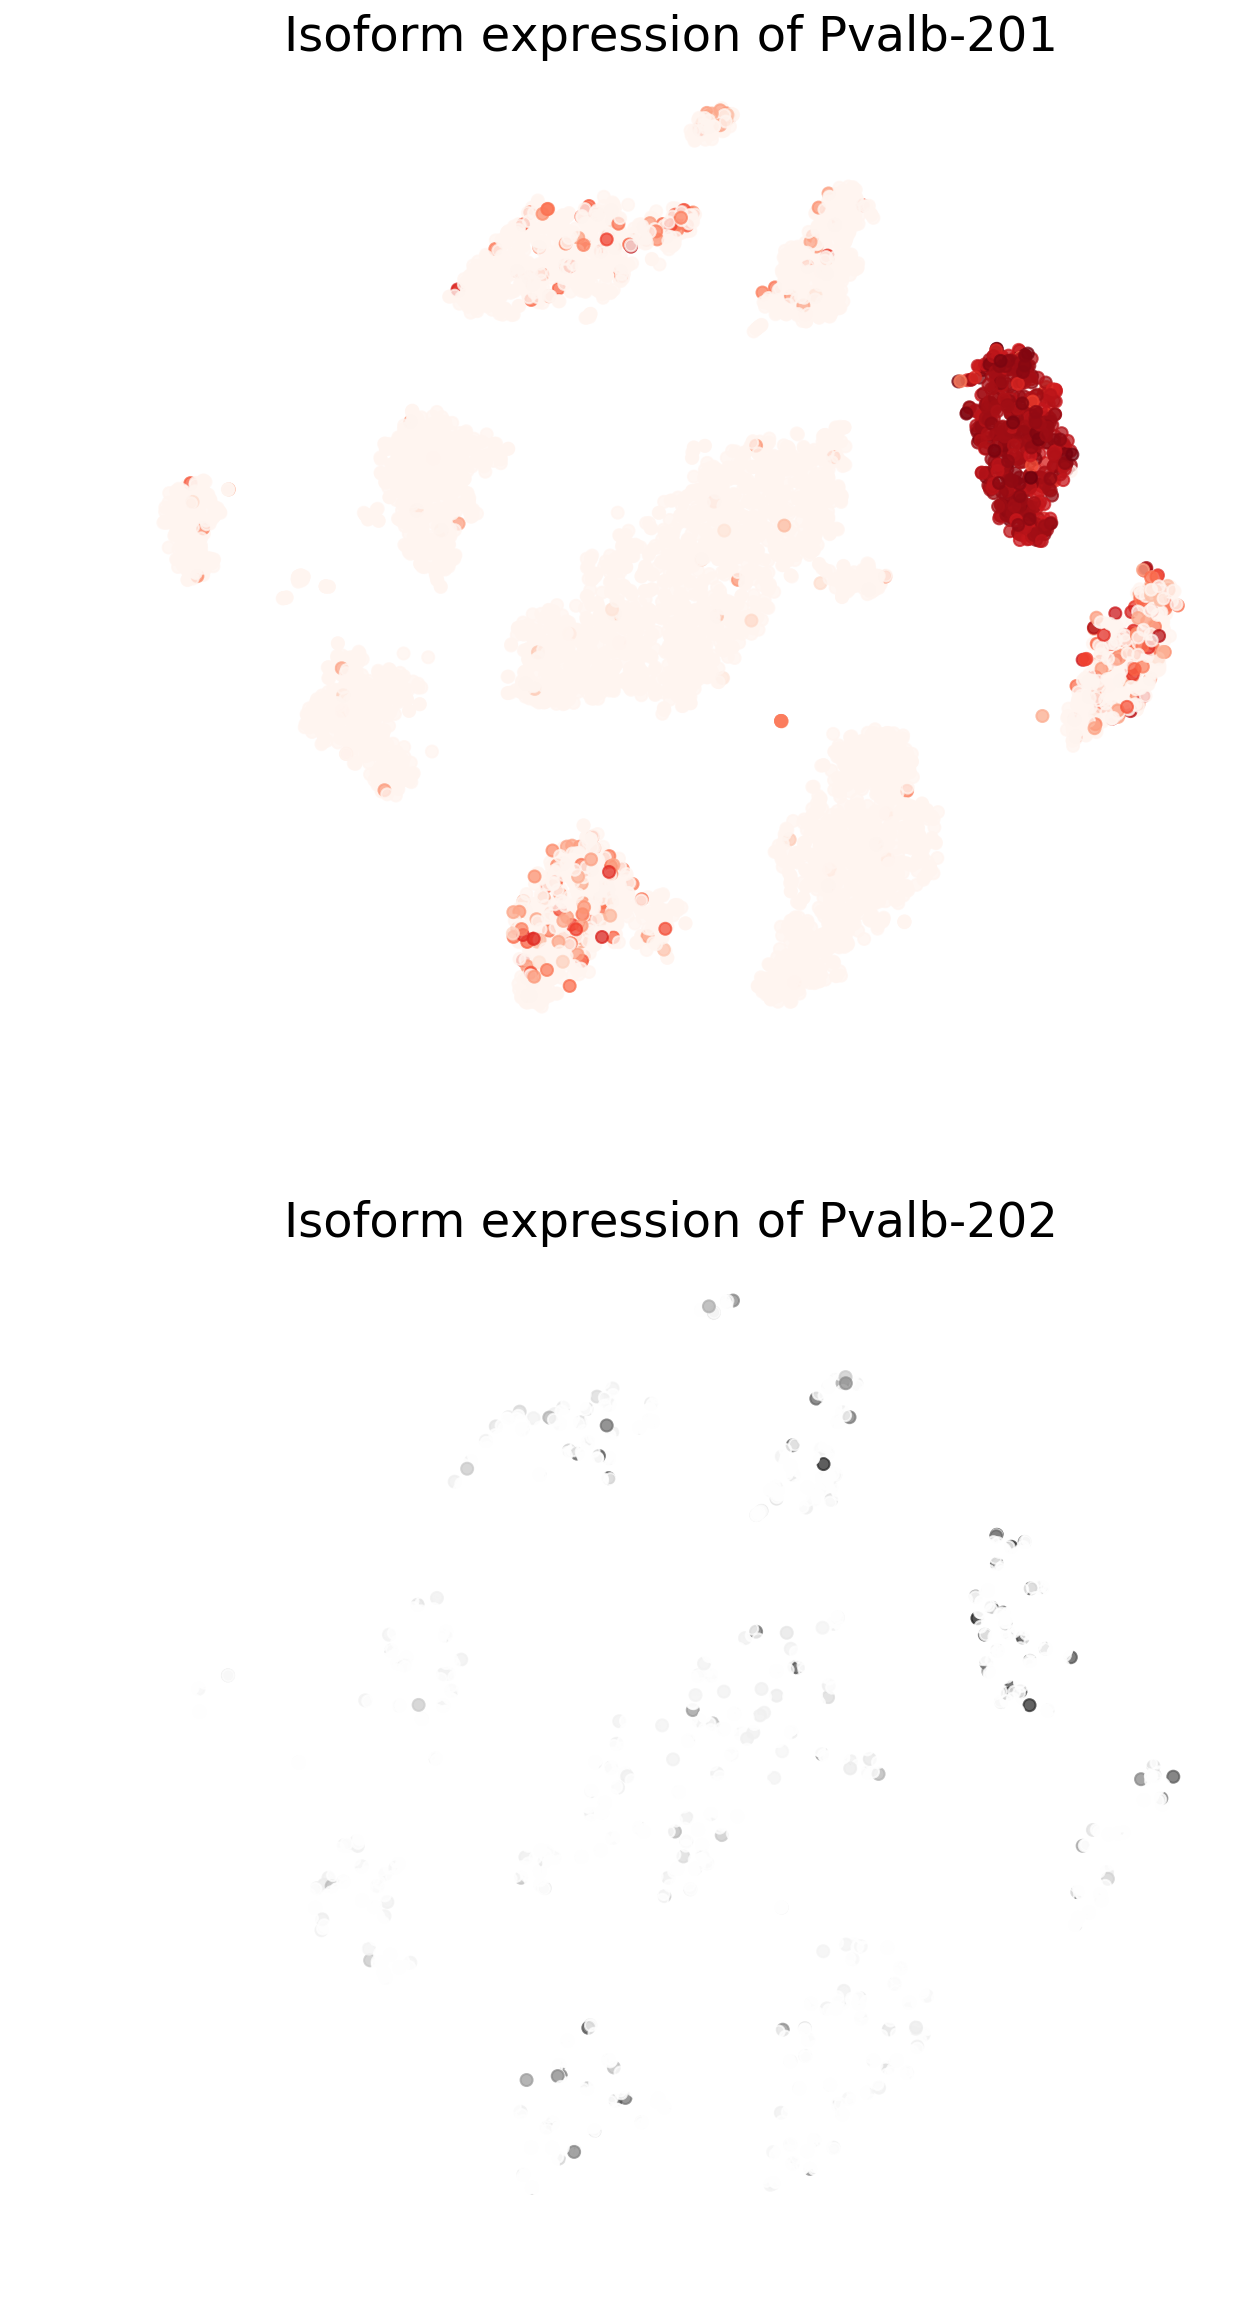

In [47]:
specific_gene = "Pvalb_ENSMUSG00000005716"
specific_isoform_1 = "Pvalb-201_ENSMUST00000005860"
specific_isoform_2 = "Pvalb-202_ENSMUST00000120592"
specific_cluster = "Pvalb"

complement_color = (0.8, 0.8, 0.8, 1.0)

fig, ax = plt.subplots(figsize=(10,20), nrows=2)


x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(isoform[:, isoform.var.transcript_name==specific_isoform_1].layers["log1p"].todense()).reshape(-1)
cmap="Reds"
alpha = 0.75
ax[0].set_title("Isoform expression of {}".format(specific_isoform_1.split("_")[0]))

ax[0].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[0].set_axis_off()


x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(isoform[:, isoform.var.transcript_name==specific_isoform_2].layers["log1p"].todense()).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[1].set_title("Isoform expression of {}".format(specific_isoform_2.split("_")[0]))

ax[1].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[1].set_axis_off()

plt.savefig("./figures/isoform_nca_{}.png".format(specific_gene.split("_")[0]),bbox_inches='tight', dpi=300)

plt.show()

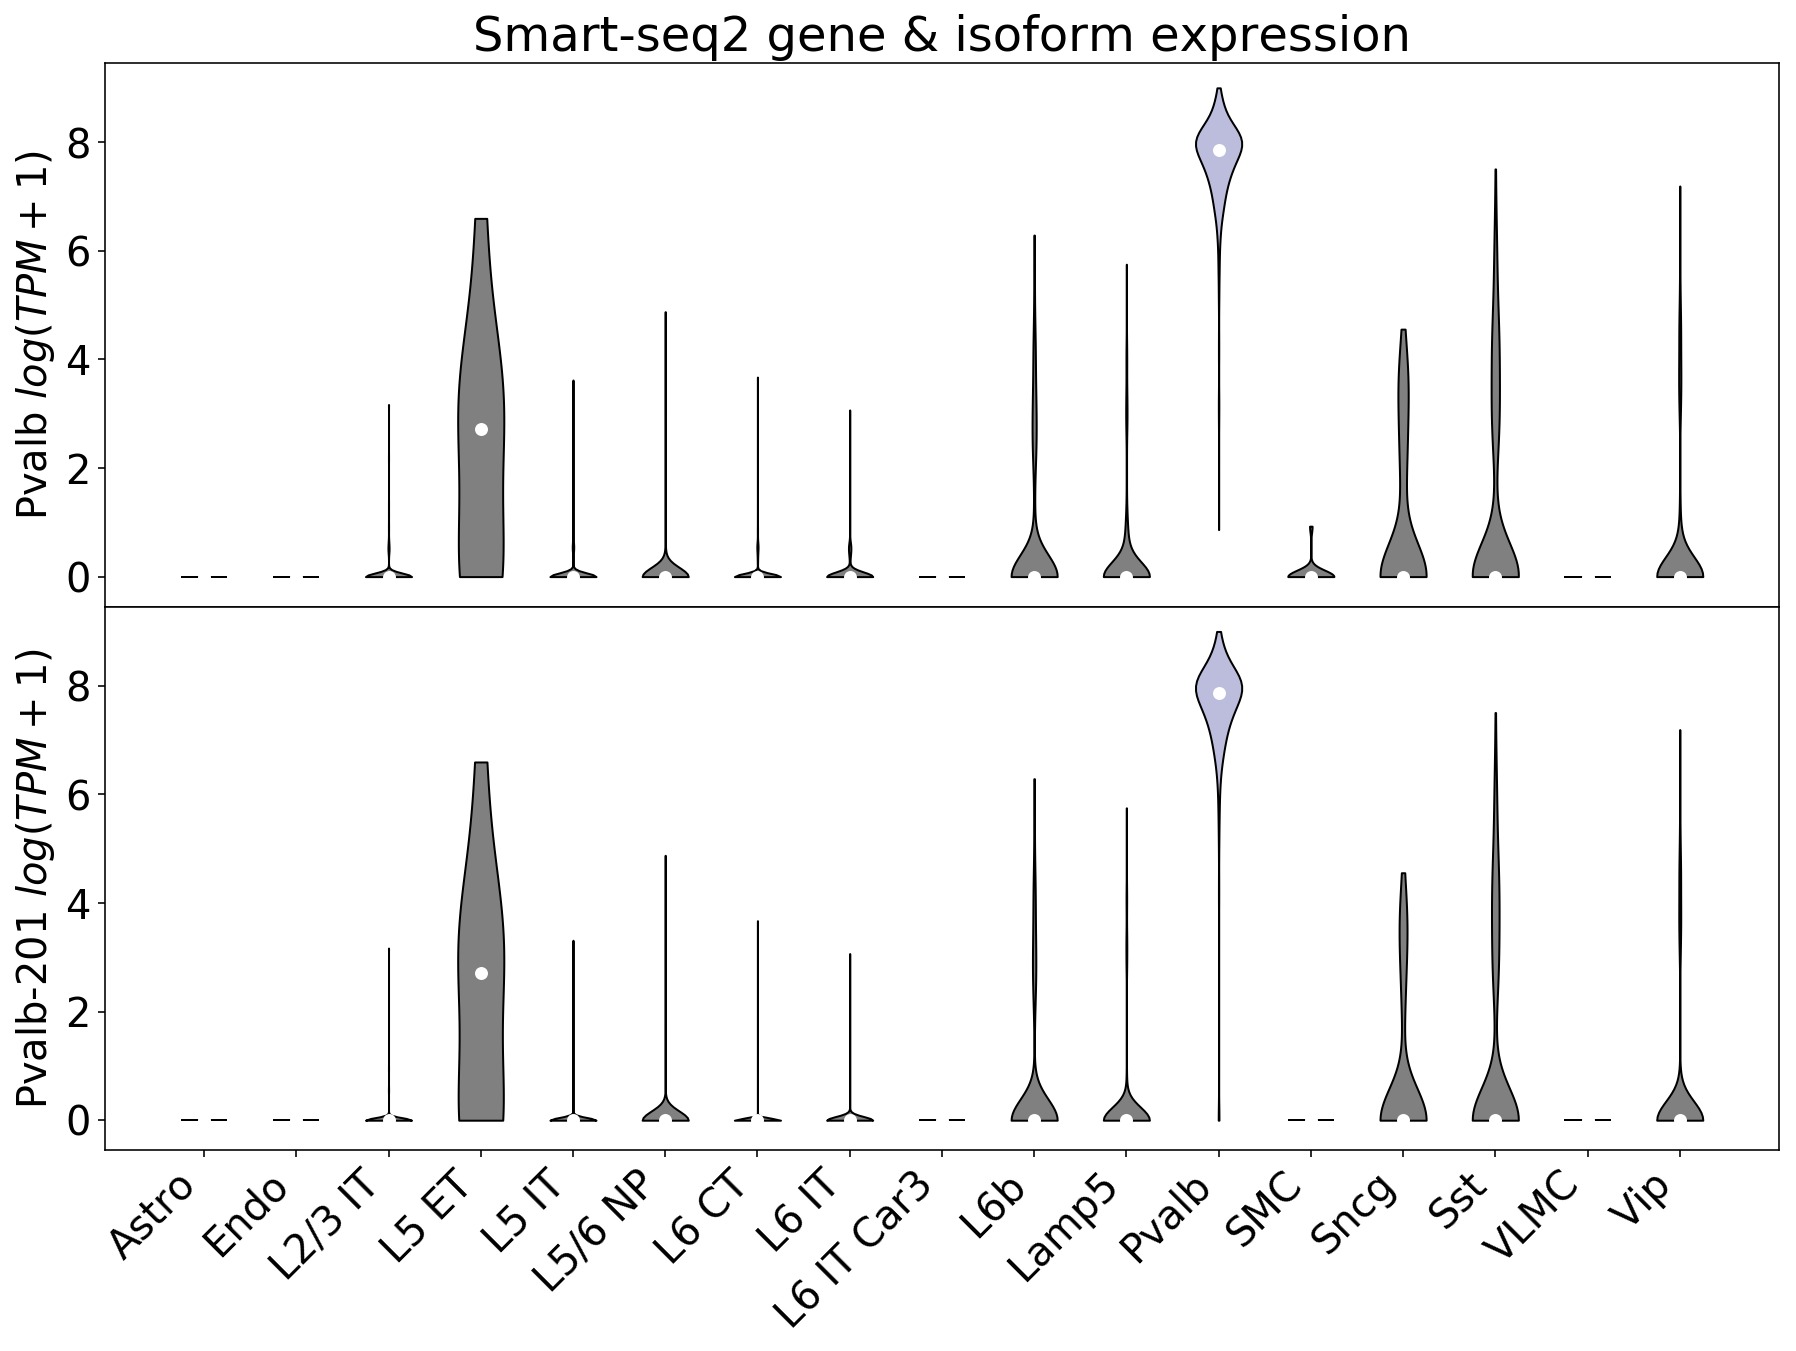

In [52]:
fig, ax = plt.subplots(figsize=(15,10), nrows=2, sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)

unique = np.unique(gene.obs.subclass_label)
unique = np.delete(unique, np.where(unique=="Low Quality"))
labels = unique
lidx = np.arange(1, len(labels)+1)  # the label locations
midx = np.where(unique==specific_cluster)[0][0]
#######3# Gene
x = []
for c in unique:
    x.append(np.asarray(gene[gene.obs.subclass_label==c][:,gene.var.gene_name==specific_gene].layers["log1p"].todense()).reshape(-1).tolist())

parts = ax[0].violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor(cluster_cmap[specific_cluster])

medians = [np.median(i) for i in x]
ax[0].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)

#ax[0].axhline(y=medians[midx], color="k")
ax[0].set_ylabel("{} $log(TPM + 1)$".format(specific_gene.split("_")[0]))
######## Isoform
x = []
for c in unique:
    x.append(np.asarray(isoform[isoform.obs.subclass_label==c][:,isoform.var.transcript_name==specific_isoform_1].layers["log1p"].todense()).reshape(-1).tolist())

parts = ax[1].violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor(cluster_cmap[specific_cluster])

medians = [np.median(i) for i in x]
ax[1].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)
#ax[1].axhline(y=medians[midx], color="k")
ax[1].set_xticks(lidx)
ax[1].set_xticklabels(labels, rotation=45, ha="right")
ax[1].set_ylabel("{} $log(TPM + 1)$".format(specific_isoform_1.split("_")[0]))
ymin, ymax = ax[0].get_ylim()
ax[1].set_ylim((ymin, ymax))
ax[0].set_title("Smart-seq2 gene & isoform expression")
plt.savefig("./figures/isoform_violin_{}.png".format(specific_gene.split("_")[0]), bbox_inches='tight',dpi=300)
plt.show()

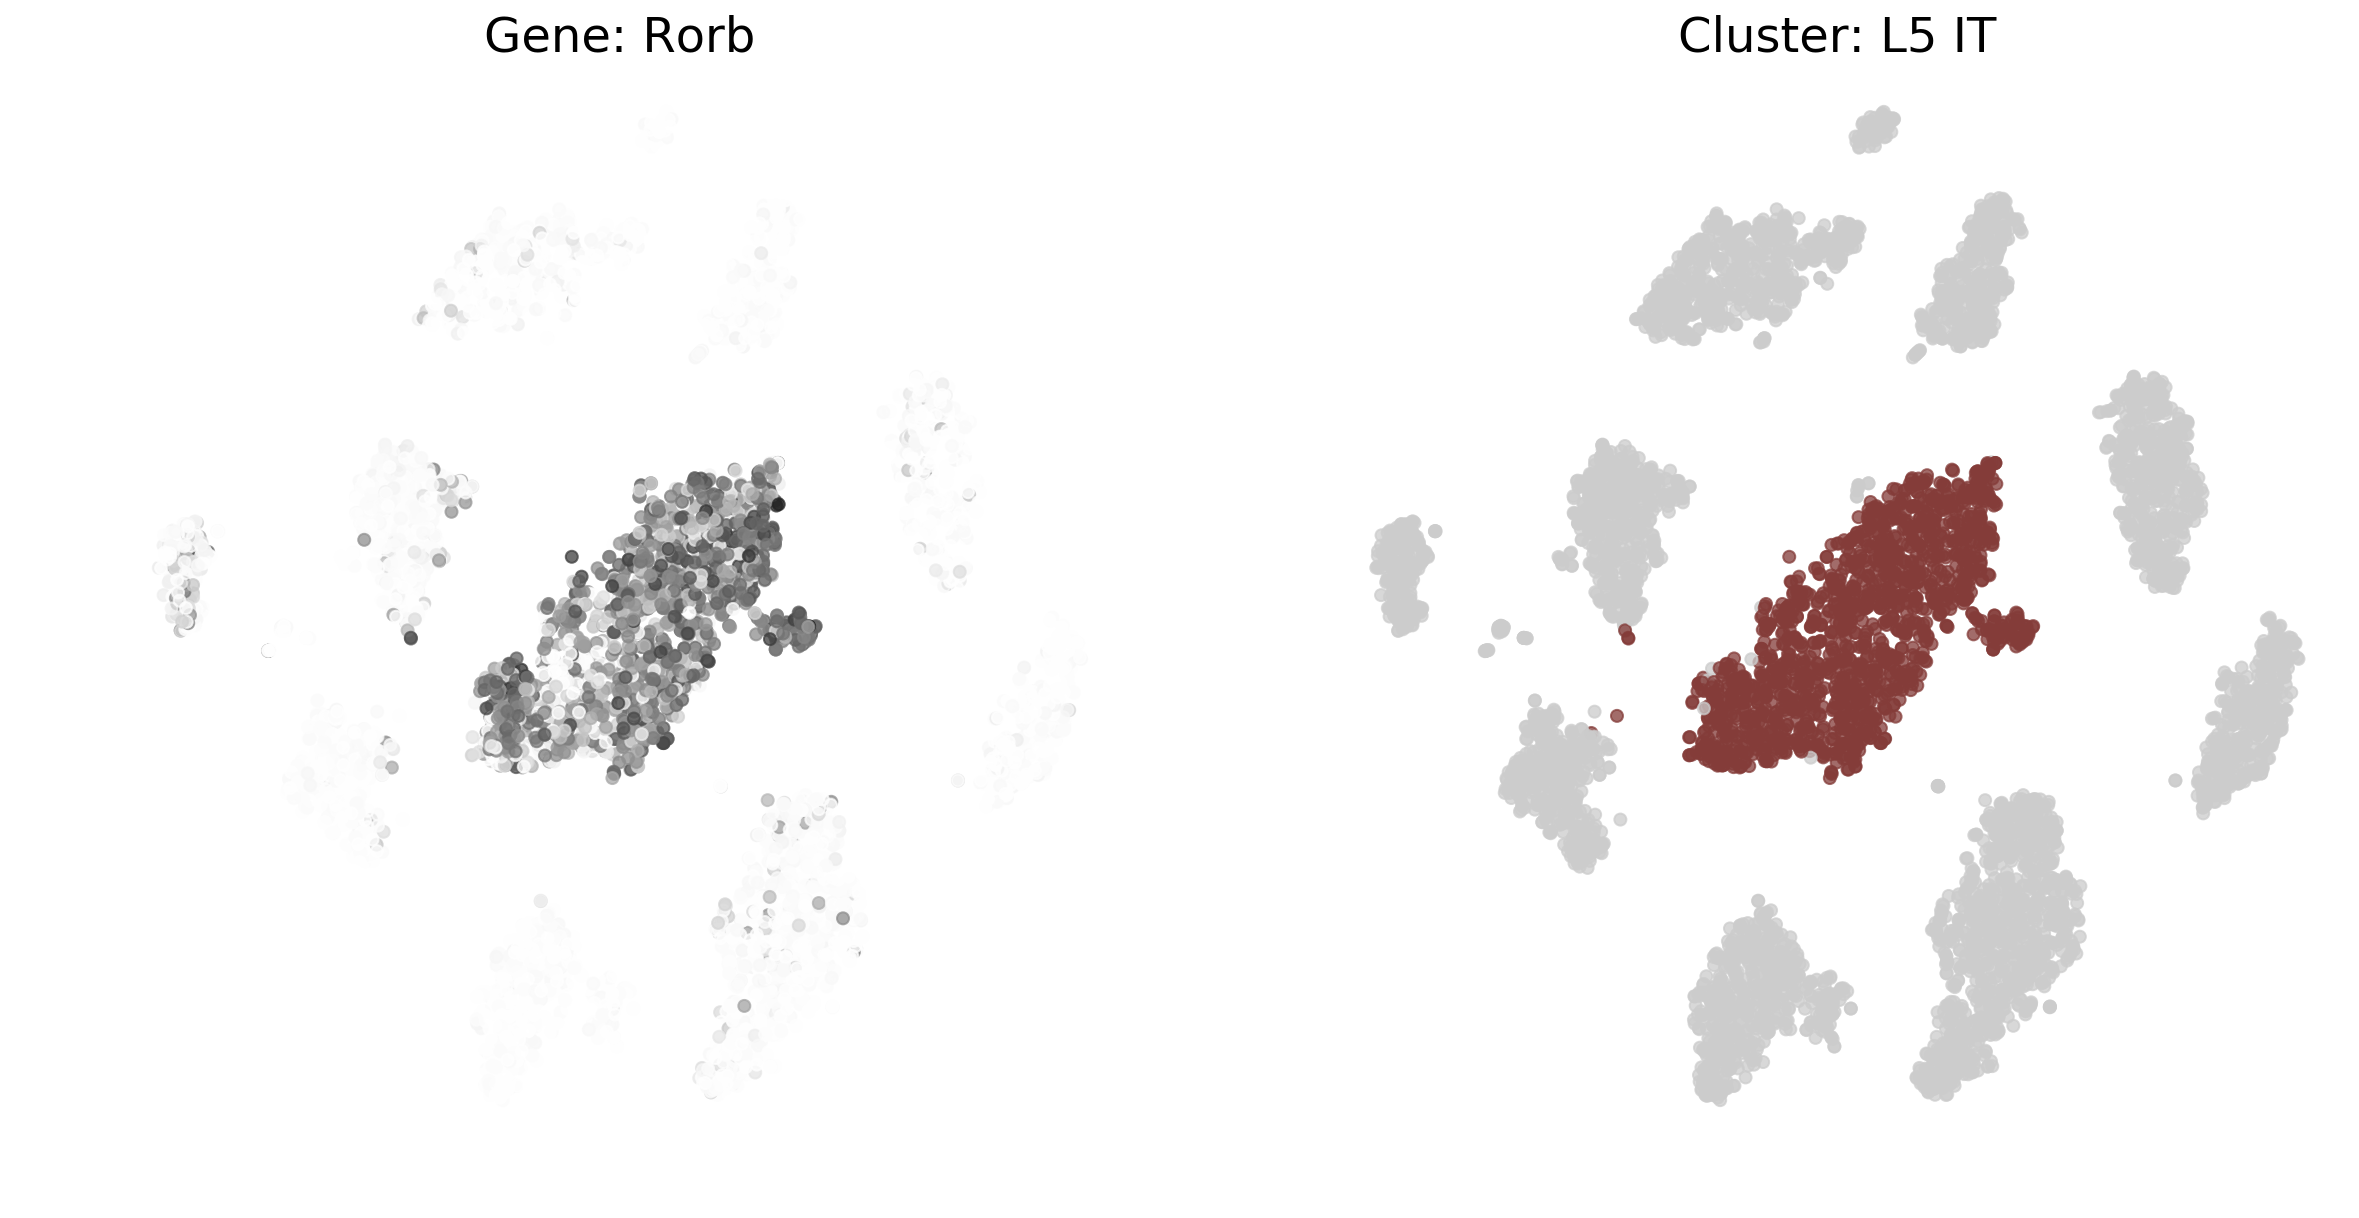

In [57]:
specific_gene = "Rorb_ENSMUSG00000036192"
specific_cluster = "L5 IT"

complement_color = (0.8, 0.8, 0.8, 1.0)

fig, ax = plt.subplots(figsize=(20,10), ncols=2)

x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]
c = np.asarray(gene[:, gene.var.gene_name==specific_gene].layers["log1p"].todense()).reshape(-1)
cmap="Greys"
alpha = 0.75
ax[0].set_title("Gene: {}".format(specific_gene.split("_")[0]))

ax[0].scatter(x, y, c=c, cmap=cmap, alpha=alpha)
ax[0].set_axis_off()

x = gene.obsm["X_nca_tsne"][:,0]
y = gene.obsm["X_nca_tsne"][:,1]

c = gene.obs["subclass_label"].astype(str).map(cluster_cmap).tolist()
indices = np.where(gene.obs["subclass_label"]!=specific_cluster)[0]
replacements=[complement_color]*len(indices)
for (index, replacement) in zip(indices, replacements):
    c[index] = replacement
alpha=0.75
cmap="nipy_spectral_r"

ax[1].scatter(x, y, c=c, cmap=cmap, alpha=alpha)


ax[1].set_axis_off()
ax[1].set_title("Cluster: {}".format(specific_cluster))
plt.savefig("./figures/gene_nca_{}.png".format(specific_gene.format(specific_gene.split("_")[0])),bbox_inches='tight', dpi=300)

plt.show()

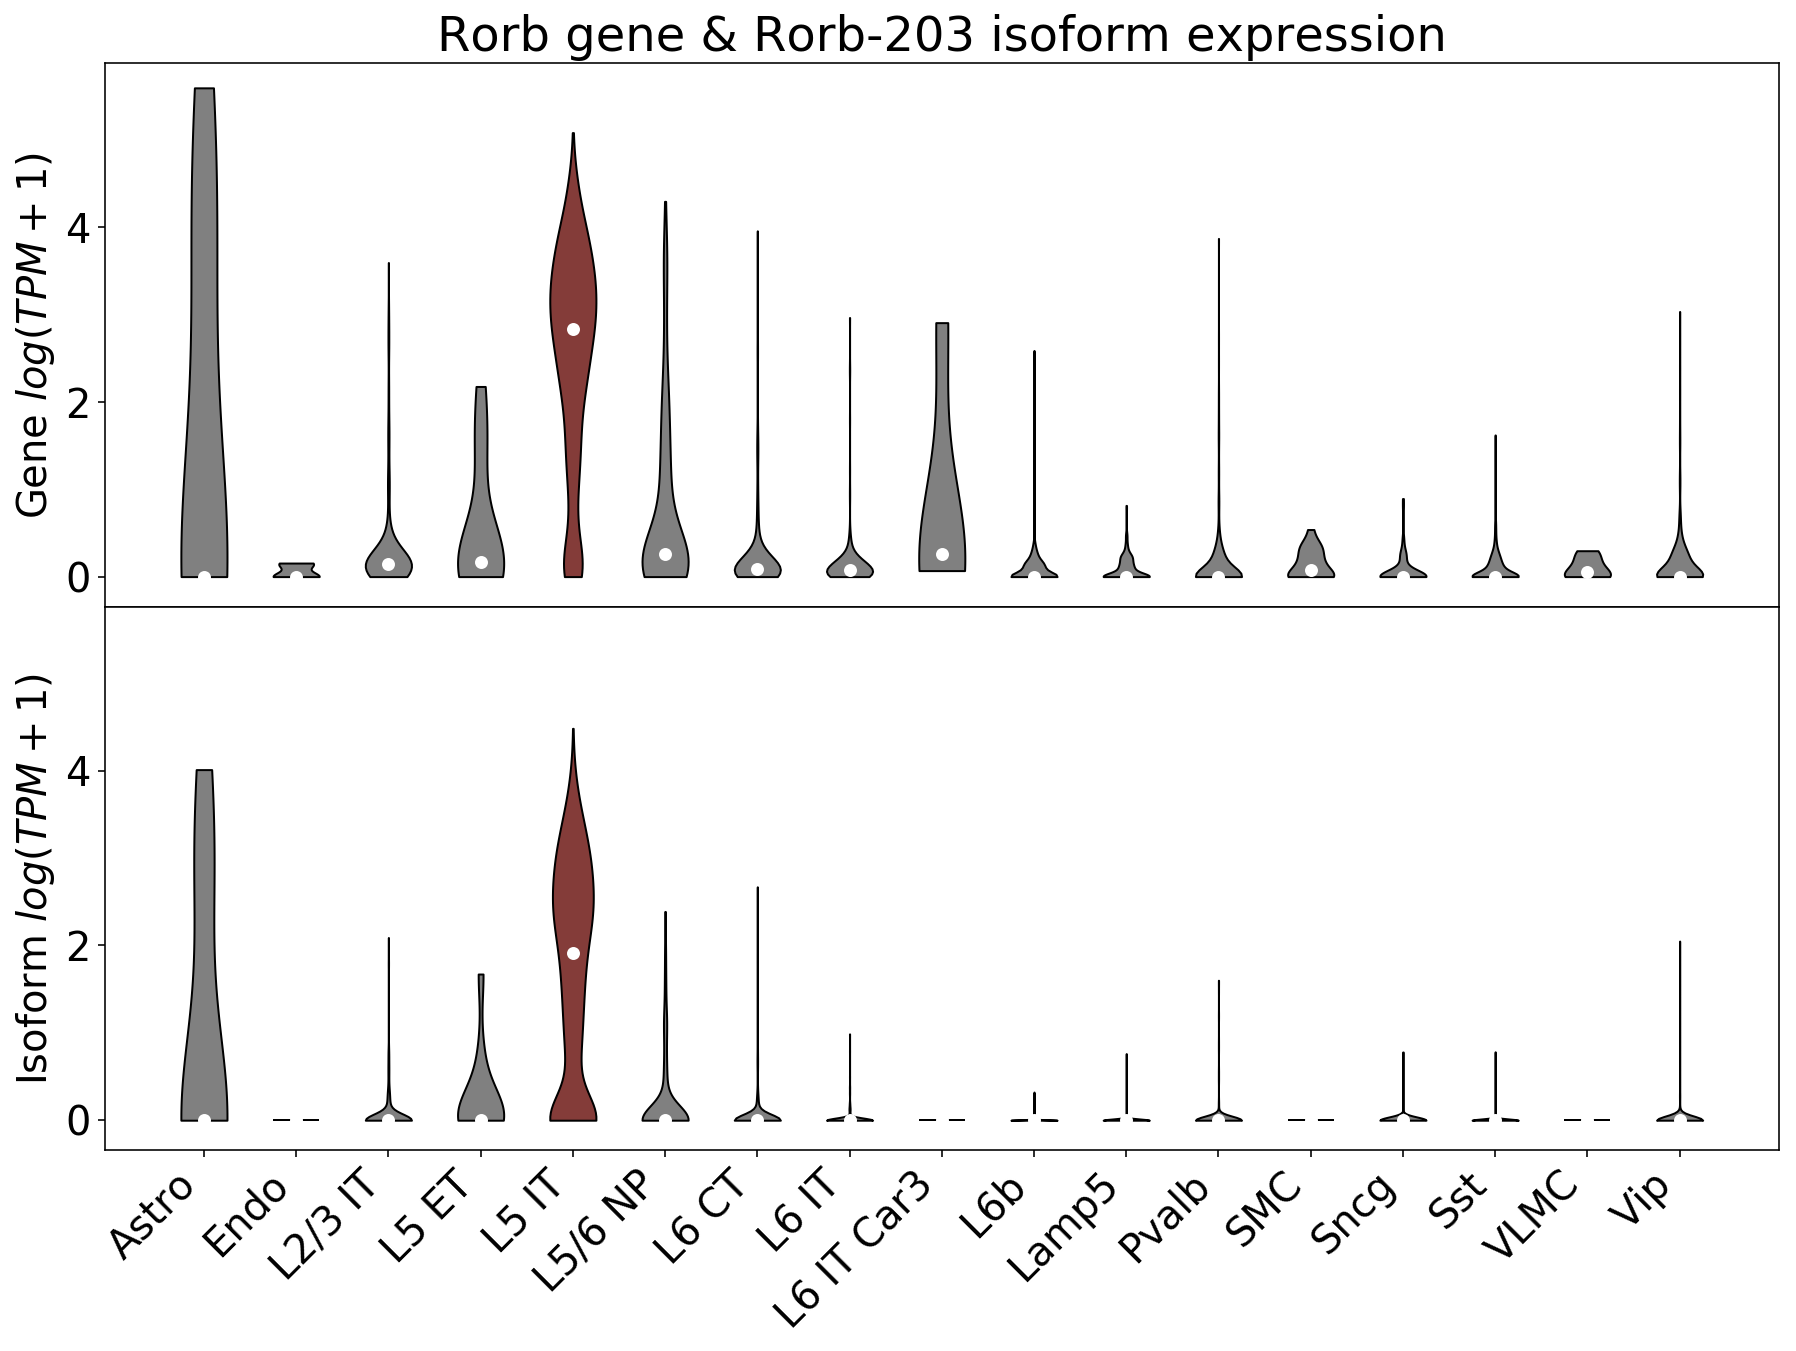

In [61]:
fig, ax = plt.subplots(figsize=(15,10), nrows=2, sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)
specific_isoform = "Rorb-203_ENSMUST00000112832"
unique = np.unique(gene.obs.subclass_label)
unique = np.delete(unique, np.where(unique=="Low Quality"))
labels = unique
lidx = np.arange(1, len(labels)+1)  # the label locations
midx = np.where(unique==specific_cluster)[0][0]
#######3# Gene
x = []
for c in unique:
    x.append(np.asarray(gene[gene.obs.subclass_label==c][:,gene.var.gene_name==specific_gene].layers["log1p"].todense()).reshape(-1).tolist())

parts = ax[0].violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor(cluster_cmap[specific_cluster])

medians = [np.median(i) for i in x]
ax[0].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)

#ax[0].axhline(y=medians[midx], color="k")
ax[0].set_ylabel("Gene $log(TPM + 1)$")
######## Isoform
x = []
for c in unique:
    x.append(np.asarray(isoform[isoform.obs.subclass_label==c][:,isoform.var.transcript_name==specific_isoform].layers["log1p"].todense()).reshape(-1).tolist())

parts = ax[1].violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('grey')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
    if pcidx == midx:
        pc.set_facecolor(cluster_cmap[specific_cluster])

medians = [np.median(i) for i in x]
ax[1].scatter(lidx, medians, marker='o', color='white', s=30, zorder=3)
#ax[1].axhline(y=medians[midx], color="k")
ax[1].set_xticks(lidx)
ax[1].set_xticklabels(labels, rotation=45, ha="right")
ax[1].set_ylabel("Isoform $log(TPM + 1)$")
ymin, ymax = ax[0].get_ylim()
ax[1].set_ylim((ymin, ymax))
ax[0].set_title("{} gene & {} isoform expression".format(specific_gene.split("_")[0], specific_isoform.split("_")[0]))
plt.savefig("./figures/gene_violin_{}.png".format(specific_gene.split("_")[0]), bbox_inches='tight',dpi=300)
plt.show()

In [66]:
def cluster_noise(mat, components, features, assignments, method="within"):
        
    unique = np.unique(assignments)
    
    
    ncomp = components.shape[0]
    nfeat = features.shape[0]
    nuniq = unique.shape[0]
    
    mean = np.empty((nuniq, nfeat))
    mean.fill(np.nan)
    
    var = np.empty((nuniq, nfeat))
    var.fill(np.nan)
    
    for uidx, u in enumerate(unique):
        print("{} of {} assignments: {}".format(uidx+1, nuniq, u))
        t_mat, c_mat = split_by_target(mat, assignments, u)
        feat_mean = t_mat.mean(axis=0)
        feat_var  = t_mat.var(axis=0)
        
        mean[uidx,:] = feat_mean
        var[uidx,:]  = feat_var
        
    return (mean, var)

def plot_yex(ax):
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()])]  # max of both axes
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

def split_by_target(mat, targets, target, axis=0):
    """
    Split the rows of mat by the proper assignment
    
    mat = ndarray
    targets, length is equal to number of components (axis=0) or features (axis=1)
    target is a singular element from unique(assignments/features) 
    """
    if axis==0 and len(targets) != mat.shape[axis]: return -1
    if axis==1 and len(targets) != mat.shape[axis]: return -1
        
    mask = targets == target
    
    if axis==0:
        t_mat = mat[mask]  # target matrix
        c_mat = mat[~mask] # complement matrix
    elif axis==1:
        t_mat = mat[:, mask]  # target matrix
        c_mat = mat[:, ~mask] # complement matrix
    
    return (t_mat, c_mat)

In [80]:
%%time

mat         = gene.layers["log1p"].todense()
components  = gene.obs.cell_id.values
features    = gene.var.gene_name.values
assignments = gene.obs.subclass_label.values

mean, var = cluster_noise(mat, components, features, assignments)

1 of 18 assignments: Astro
2 of 18 assignments: Endo
3 of 18 assignments: L2/3 IT
4 of 18 assignments: L5 ET
5 of 18 assignments: L5 IT
6 of 18 assignments: L5/6 NP
7 of 18 assignments: L6 CT
8 of 18 assignments: L6 IT
9 of 18 assignments: L6 IT Car3
10 of 18 assignments: L6b
11 of 18 assignments: Lamp5
12 of 18 assignments: Low Quality
13 of 18 assignments: Pvalb
14 of 18 assignments: SMC
15 of 18 assignments: Sncg
16 of 18 assignments: Sst
17 of 18 assignments: VLMC
18 of 18 assignments: Vip
CPU times: user 2.74 s, sys: 4.47 s, total: 7.21 s
Wall time: 7.19 s


In [81]:
mean_of_var = np.mean(var, axis=0)
var_of_mean = np.var(mean, axis=0)

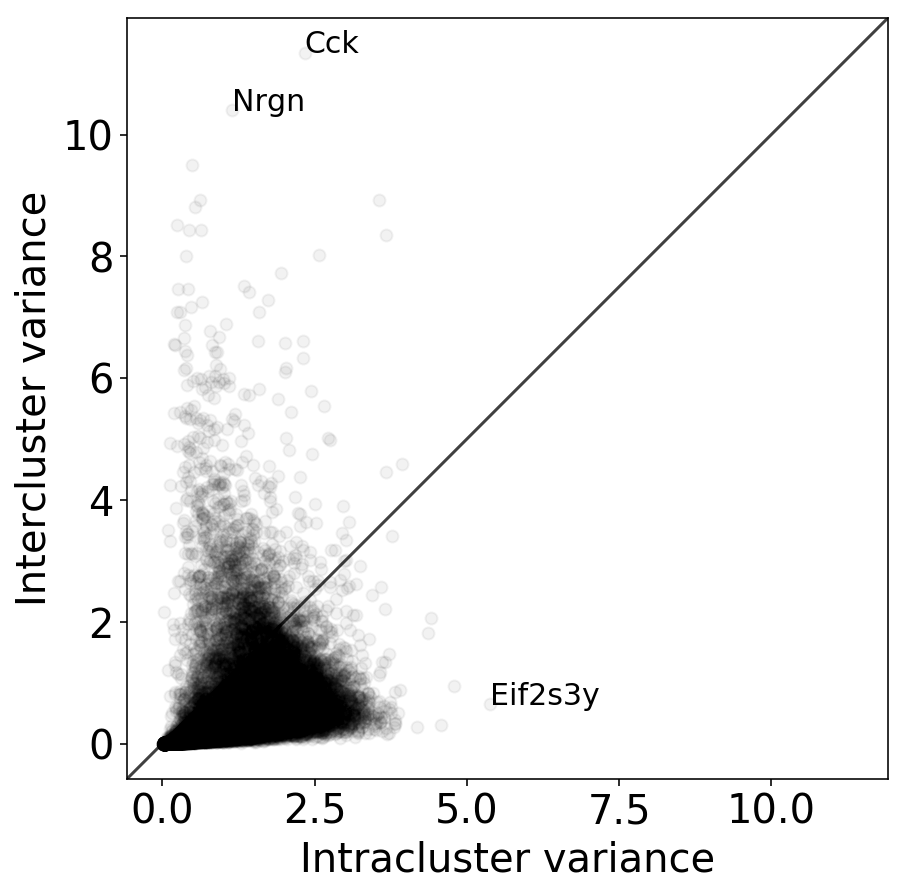

In [83]:
fig, ax = plt.subplots(figsize=(7,7))

x = mean_of_var
y = var_of_mean
alpha=0.05
color="k"
xline=4.8
yline=10

ax.scatter(x, y, alpha=alpha, color=color)

for i, txt in enumerate(features):
    if x[i] > xline or y[i]>yline:
        ax.annotate(txt.split("_")[0], (x[i], y[i]), fontsize=fsize-5)

ax = plot_yex(ax)
ax.set_xlabel("Intracluster variance")
ax.set_ylabel("Intercluster variance")

plt.savefig("./figures/inter_intra_gene.png", bbox_inches='tight',dpi=300)

        
plt.show()

## Isoform level

In [84]:
%%time

mat         = isoform.layers["log1p"].todense()
components  = isoform.obs.cell_id.values
features    = isoform.var.transcript_name.values
assignments = isoform.obs.subclass_label.values

mean, var = cluster_noise(mat, components, features, assignments)

1 of 18 assignments: Astro
2 of 18 assignments: Endo
3 of 18 assignments: L2/3 IT
4 of 18 assignments: L5 ET
5 of 18 assignments: L5 IT
6 of 18 assignments: L5/6 NP
7 of 18 assignments: L6 CT
8 of 18 assignments: L6 IT
9 of 18 assignments: L6 IT Car3
10 of 18 assignments: L6b
11 of 18 assignments: Lamp5
12 of 18 assignments: Low Quality
13 of 18 assignments: Pvalb
14 of 18 assignments: SMC
15 of 18 assignments: Sncg
16 of 18 assignments: Sst
17 of 18 assignments: VLMC
18 of 18 assignments: Vip
CPU times: user 10.1 s, sys: 16.4 s, total: 26.5 s
Wall time: 26.5 s


In [85]:
mean_of_var = np.mean(var, axis=0)
var_of_mean = np.var(mean, axis=0)

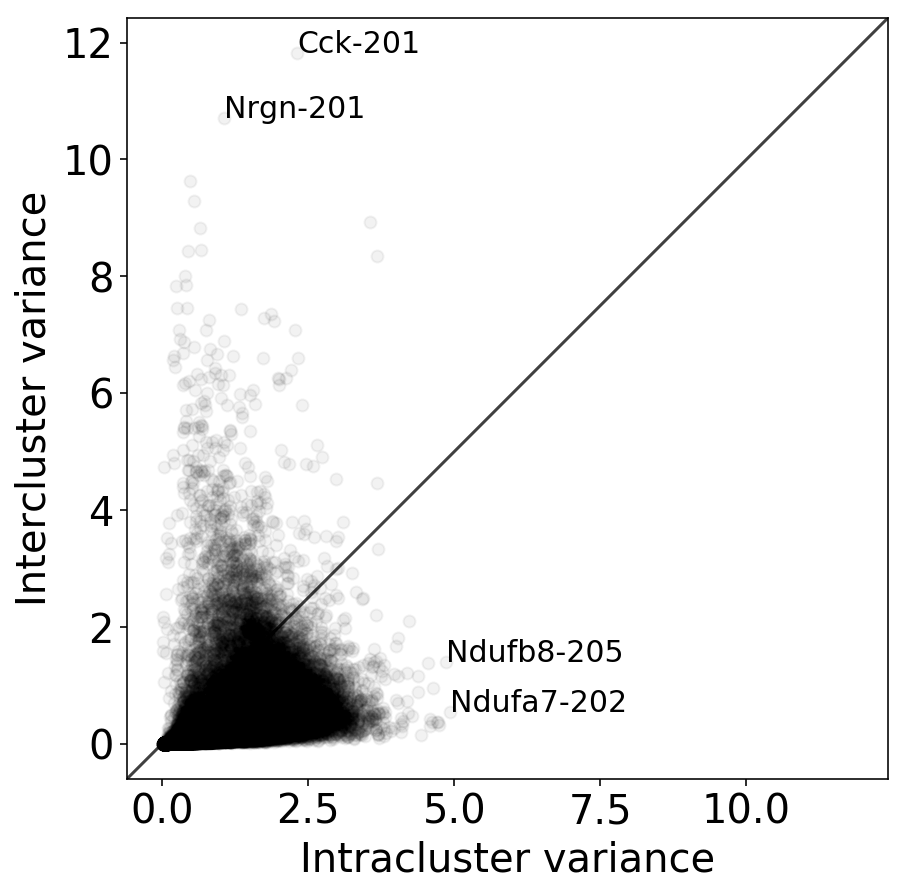

In [86]:
fig, ax = plt.subplots(figsize=(7,7))

x = mean_of_var
y = var_of_mean
alpha=0.05
color="k"
xline=4.8
yline=10

ax.scatter(x, y, alpha=alpha, color=color)

for i, txt in enumerate(features):
    if x[i] > xline or y[i]>yline:
        ax.annotate(txt.split("_")[0], (x[i], y[i]), fontsize=fsize-5)

ax = plot_yex(ax)
ax.set_xlabel("Intracluster variance")
ax.set_ylabel("Intercluster variance")

plt.savefig("./figures/inter_intra_isoform.png", bbox_inches='tight',dpi=300)

        
plt.show()